## Klasyfikacja z użyciem sztucznych neuronów

W ramach wstępu do tematyki sieci neuronowych przedstawiony zostanie pojedynczy sztuczny neuron, a następnie pojedyncza warstwa sztucznych neuronów, w zadaniu klasyfikacji do liniowo separowalnych klas.

### Klasyfikacja

Klasyfikacja jest bardzo istotnym zadaniem uczenia maszynowego, polegającym na automatycznym przypisywaniu (klasyfikowaniu) jakichś danych (liczbowych, tekstowych, wizualnych) do jednej z ustalonych kategorii, które najczęściej znamy i rozumiemy:


*   Zdjęcie płuca - chore / zdrowe
*   Treść maila - spam / nie spam
*   Pomiary odcisku łapy - niedźwiedź / wilk / sarna / żubr
*   Odwiedzone strony internetowe - wykształcenie podstawowe / średnie / wyższe



### Tło biologiczne

W bardzo dużym (i nie całkiem poprawnym, bo biologia jest znacznie bardziej skomplikowana) uproszczeniu, biologiczny neuron posiada wiele "wejść" (dendrytów) i jedno "wyjście" (akson). Sygnały przychodzące dendrytami mogą być pobudzające lub hamujące. Gdy pobudzenie jest odpowiednio duże, neuron wysyła sygnał w dół aksonu, "komunikując się" w ten sposób z innymi neuronami.

### Perceptron
Najprostszym <mark>
modelem sztucznego neuronu</mark>
 jest perceptron, który <mark>agreguje wejścia $x_1, x_2, ... , x_n$ </mark>i na podstawie <mark>funkcji aktywacji  przetwarza je na wyjście $y$</mark>, co można opisać wzorem:

<mark>$y = f(\sum_i (x_iw_i) + b)$</mark>

<mark>Najczęściej</mark> używaną funkcją aktywacji we wczesnym perceptronie była prosta funkcja:


$f(x)=
\begin{cases}
0, x < 0 \\
1, x \geq 0
\end{cases}$

<mark>symulująca zachowanie faktycznych neuronów (kiedy pobudzenie przekracza próg, wysyłają sygnał)</mark>

Schemat perceptronu został zaprezentowany poniżej:

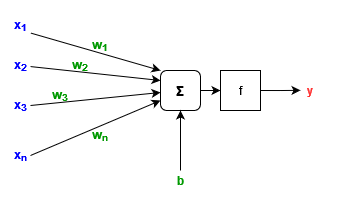

Można zauważyć, że pojedynczy perceptron reprezentuje funkcję, która jest warta 1, kiedy $\sum_i (x_iw_i) + b \geq 0$.

Przypomnienie z algebry: <mark>dla dwuwymiarowej przestrzeni z osiami opisanymi $x_1$, $x_2$ wzór $w_1x_1+w_2x_2+b = 0$ opisuje prostą, a $w_1x_1+w_2x_2+b \geq 0$ półpłaszczyznę.</mark> Dla wyższych wymiarów będzie to jakaś hiperpłaszczyzna separująca $R^n$ na dwie części.

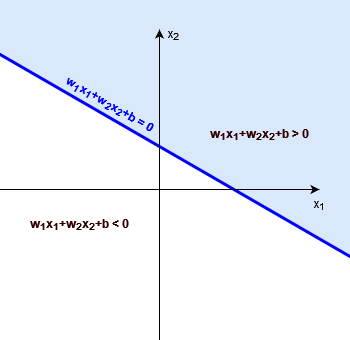

Żeby perceptron mógł skutecznie dokonać klasyfikacji, klasy muszą być **liniowo separowalne!**

### Jak znaleźć wagi?

* Mamy <mark>zbiór punktów, na których "uczymy" perceptron (znamy ich klasę)</mark>
* <mark>Losujemy</mark> początkowe wagi
* Podajemy punkt, sprawdzamy, czy klasa przewidziana przez perceptron zgadza się z faktyczną klasą - na podstawie błędu zmieniamy wagi: $w_i^{k+1} = w_i^k + \Delta w_i^k$ (jak znaleźć $\Delta w_i^k$? - **odpowiedzi na wykładach**)
* Proces musimy powtórzyć odpowiednio dużo razy dla wszystkich danych uczących

Proces został przedstawiony poniżej:

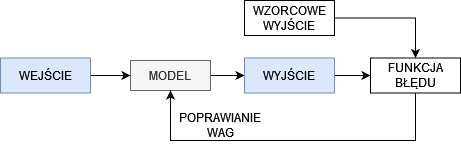

Jest to tzw. <mark>uczenie z nauczycielem</mark>, w którym poprawiamy model na podstawie różnicy między wyjściem a znanym, wzorcowym wyjściem. Wymaga to, żebyśmy znali poprawne etykiety klas, przynajmniej dla jakiegoś niewielkiego zbioru, który wykorzystujemy do uczenia i testowania sieci. <mark>Podziałem zbioru na klasy, kiedy poprawne etykiety nie są znane, zajmuje się klasteryzacja.</mark>

### Przykład perceptronu



In [ ]:
from sklearn.linear_model import Perceptron
# dokumentacja perceptronu: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

# przygotowujemy wzorcowe dane uczące. X to współrzędne, y to klasa, do której należą
X = [[0.,0.],[1.,0.],[-1.,0],[-1.,-1],[1.,1]]
y = [0,1,0,0,1]

# przygotowujemy perceptron.
neuron = Perceptron(tol=1e-3, max_iter = 20)

# fitujemy perceptron do danych wejściowych (dane + etykiety)
# uczymy neuron przez wskazaną liczbę epok lub do zatrzymania się uczenia
neuron.fit(X, y)  # procedura znajdowania wlasciwych wag i biasow = jedna linijka by uruchomic algorytm

# możemy sprawdzić jak udane było uczenie:
neuron.score(X, y)

1.0

In [ ]:

# Zobaczmy, jak wyglądają wagi neuronu:
neuron.coef_

array([[2., 1.]])

In [ ]:
# Zobaczmy, jak wygląda bias neuronu:
neuron.intercept_

array([-1.])

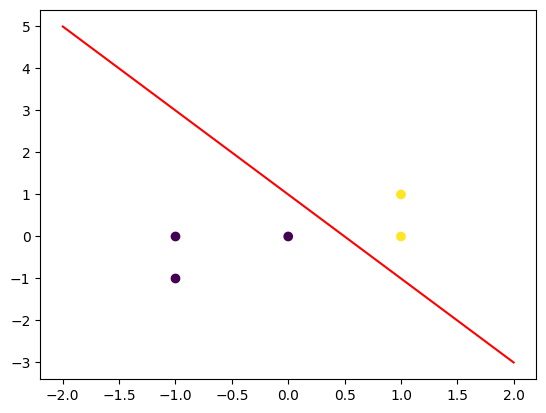

In [ ]:
# Spróbujmy narysować funkcję, jaką przybliża neuron i jak wyglądają dane uczące:
import numpy as np
import matplotlib.pyplot as plt

# pkt. pocz, pkt. konc, ile punktow
x1 = np.linspace(-2,2,100)

# wzór x2 = a*x1+c wymaga trochę prostych przekształceń algebraicznych z postaci w1x1+w2x2+b=0
x2 = -(1./neuron.coef_[0][1])*(neuron.coef_[0][0]*x1+neuron.intercept_[0])
plt.plot(x1, x2, '-r')

# od tego momentu dla wygody i uproszczenia zapisu stosowane będą arraye pakietu numpy, które pozwalają na łatwiejszą pracę z wielowymiarowymi danymi
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=y)
plt.show()

### Warstwa perceptronów

W wielu praktycznych zastosowaniach <mark>klasyfikujemy do większej liczby klas niż dwie</mark>. Możemy osiągnąć to za pomocą <mark>warstwy niezależnych od siebie perceptronów.</mark> <mark>Kombinacja wyjść perceptronów jest numerem klasy (np. w naturalnym systemie binarnym). </mark>Przykładowy podział przestrzeni za pomocą dwóch neuronów został przedstawiony na poniższym schemacie. Zakładamy, że pierwszy perceptron ma wagi w1, w2 i bias b, a drugi perceptron ma wagi v1, v2 i bias c.

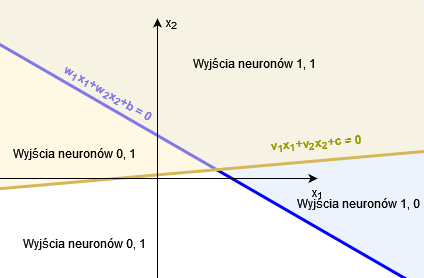

In [ ]:
from sklearn.metrics import confusion_matrix
# przykład klasyfikacji do czterech klas za pomocą dwóch perceptronów

# tym razem skorzystamy z pseudolosowych rozkładów punktów.
# normal(srodkowa_wartosc, odchylenie, [ilepunktow,jaki_wymiar])
X2 = np.concatenate((np.random.normal([-2,-2.5],[1,1],[200,2]), np.random.normal([-1.5,2],[1,1],[200,2]), np.random.normal([2.5,-1.8],[1,1],[200,2]), np.random.normal([3.2,2.0],[1,1],[200,2])))
y2 = np.concatenate((np.array([[0,0]]*200),np.array([[0,1]]*200),np.array([[1,0]]*200),np.array([[1,1]]*200)))

# na razie spróbujmy zrobić klasyfikację "ręcznie", tj. biorąc dwa niezależne neurony. Wszystkie biblioteki są w stanie zrobić to za nas, zrobimy to jednak na cele przykładu.
neuron_1 = Perceptron(tol=1e-3, max_iter = 20)
neuron_2 = Perceptron(tol=1e-3, max_iter = 20)

# 2 perceptrony = warstwa perceptronow = kombinacja ich wyników to ostateczna klasa
neuron_1.fit(X2, y2[:,0])
neuron_2.fit(X2, y2[:,1])

neuron_1.predict(X2) # zwraca etykiety podanych danych, na podstawie wyuczonych wag oraz biasu

y2_predict = np.vstack((neuron_1.predict(X2),neuron_2.predict(X2))).T

# ze względu na to, że podstawowa funkcja confusion_matrix nie obsługuje etykiet klas podanych jako arraye, zamieńmy je na liczby:
y2_labels = [2*i[0]+i[1] for i in y2]
y2_predict_labels = [2*i[0]+i[1] for i in y2_predict]

confusion_matrix_2 = confusion_matrix(y2_labels, y2_predict_labels)
confusion_matrix_2

array([[184,   2,  14,   0],
       [  2, 195,   0,   3],
       [  1,   0, 197,   2],
       [  0,   3,  16, 181]])

### Dla lepszego display'a macierzy

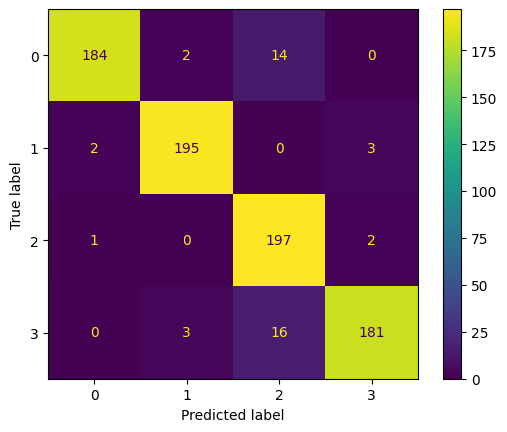

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_2)
disp.plot()

In [ ]:
# zliczając elementy z diagonali możemy zobaczyć ilość poprawnych trafień:
accuracy = (confusion_matrix_2[0,0] + confusion_matrix_2[1,1] + confusion_matrix_2[2,2] + confusion_matrix_2[3,3]) / np.sum(confusion_matrix_2)
accuracy

0.94625

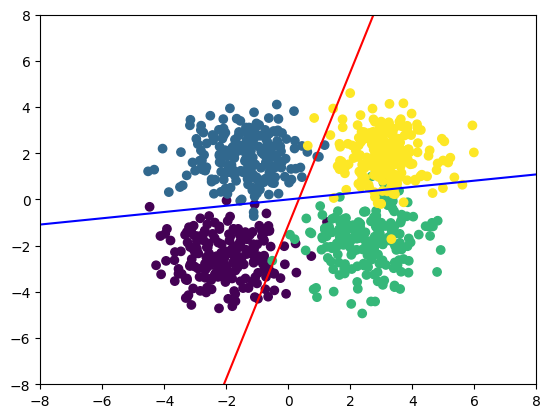

In [ ]:
# wreszcie spróbujmy narysować zbiory i sposób, w jaki neurony podzieliły przestrzeń

x1 = np.linspace(-8,8,100)
neuron_1_x2 = -(1./neuron_1.coef_[0][1])*(neuron_1.coef_[0][0]*x1+neuron_1.intercept_[0])
neuron_2_x2 = -(1./neuron_2.coef_[0][1])*(neuron_2.coef_[0][0]*x1+neuron_2.intercept_[0])

plt.plot(x1, neuron_1_x2, '-r')
plt.plot(x1, neuron_2_x2, '-b')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.scatter(X2[:,0], X2[:,1], c=y2_labels)
plt.show()

<mark>Na szczęście niemal wszystkie modele wbudowane w biblioteki i moduły różnych języków pozwalają na bardziej elastyczną pracę na klasyfikacji do wielu klas.</mark> Przedstawione teraz zostanie <mark>prostsze wykorzystanie klasy Perceptron dla tych samych danych.</mark>

In [ ]:
perceptron_layer = Perceptron(tol=1e-3, max_iter = 20)

# przypomnienie, że y2 labels zawiera wartości 0,1,2,3 zamiast 00, 01, 10, 11.
perceptron_layer.fit(X2, y2_labels) # czyli jako etykiety mozna wstawic od razu tabele klas wiecej niz binarnych
perceptron_layer.score(X2, y2_labels)

0.94875

In [ ]:
# zobaczmy wagi modelu. Zobaczymy, że jest ich odpowiednio więcej, bo model musiał stworzyć więcej neuronów:
perceptron_layer.coef_

array([[-6.75341402, -6.22863037],
       [-7.28203988,  7.14688783],
       [ 6.71944202, -5.19327319],
       [10.90621642,  6.86422721]])

In [ ]:
# zobaczmy biasy modelu:
perceptron_layer.intercept_

array([-14., -13., -23., -28.])

<mark>Widzimy, że Perceptron z modułu Sklearn stworzył aż cztery neurony. Wynika to z różnic w kodowaniu rozwiązania.</mark>Możemy zobaczyć, jak wygląda podział przestrzeni wygenerowany przez klasę.

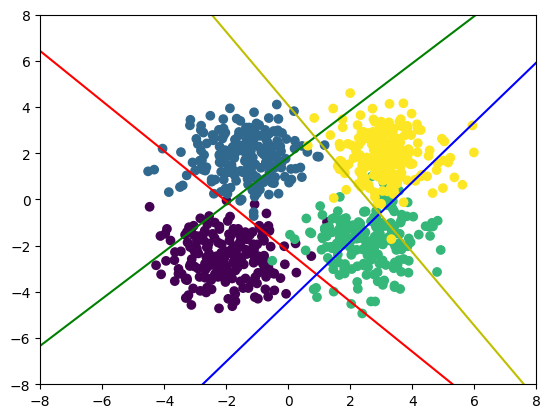

In [ ]:
x1 = np.linspace(-8,8,100)
separation_1 = -(1./perceptron_layer.coef_[0][1])*(perceptron_layer.coef_[0][0]*x1+perceptron_layer.intercept_[0])
separation_2 = -(1./perceptron_layer.coef_[1][1])*(perceptron_layer.coef_[1][0]*x1+perceptron_layer.intercept_[1])
separation_3 = -(1./perceptron_layer.coef_[2][1])*(perceptron_layer.coef_[2][0]*x1+perceptron_layer.intercept_[2])
separation_4 = -(1./perceptron_layer.coef_[3][1])*(perceptron_layer.coef_[3][0]*x1+perceptron_layer.intercept_[3])

plt.plot(x1, separation_1, '-r')
plt.plot(x1, separation_2, '-g')
plt.plot(x1, separation_3, '-b')
plt.plot(x1, separation_4, '-y')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.scatter(X2[:,0], X2[:,1], c=y2_labels)
plt.show()

Można zauważyć, że <mark>większa liczba neuronów dokonuje separacji przestrzeni na więcej części, co może jednak wymagać dłuższego uczenia i przyczynia się do zwiększenia poziomu skomplikowania modelu.</mark> W wypadku liczby zbiorów tak małej jak cztery, w dwuwymiarowej przestrzeni na szczęście nie musimy się tym (raczej) przejmować. Warto też zauważyć, że nie wszystkie części przestrzeni są wykorzystane, z czym będziemy mieć do czynienia właściwie zawsze (chyba, że ilość naszych klas jest potęgą liczby 2).

### Próba ucząca a próba testująca

<mark>Zazwyczaj nauczony model ma działać na innych danych niż te, które posłużyły do jego uczenia - chcemy, żeby model był w stanie poradzić sobie poza samym środowiskiem uczącym!</mark> Zobaczmy, jak nasz model poradzi sobie dla zestawu punktów testujących.

In [ ]:
X_test = np.array([[-0.8, 3.6],[0.,-1],[-0.2,-1],[0.4,-4],[1.5,5],[2.,3.],[1.2, -3.5],[-0.5,-3]])
y_test = [0,0,0,1,1,1,1,0]

# sprawdźmy ilość poprawnych trafień, tym razem dla zbioru testującego
neuron.score(X_test,y_test)

0.625

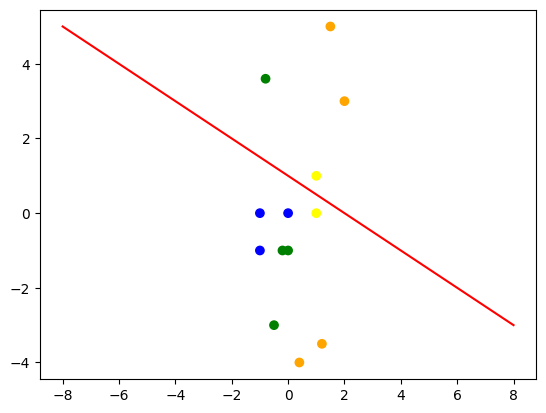

In [ ]:
# Spróbujmy narysować zbiór uczący razem z testującym
from matplotlib.colors import ListedColormap

cmap_y = ListedColormap(['blue', 'yellow'])
cmap_y_test = ListedColormap(['green', 'orange'])

plt.plot(x1, x2, '-r')
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=y, cmap=cmap_y)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test,cmap=cmap_y_test)

**Wniosek**: podział zbioru na dane uczące i testujące jest bardzo istotny!

## Preprocessing danych wejściowych

Dane, na których pracujemy, często pochodzą z różnych źródeł. Mogą być niepełne, zawierać błędy, skale poszczególnych wymiarów są często bardzo różne. Na tych i kolejnych laboratoriach będziemy wprowadzać niektóre techniki preprocessingu.

### Skalowanie

Jeżeli <mark>wprowadzone dane mają różne skale pomiędzy wymiarami (osiami), należy je przeskalować,</mark> tj. doprowadzić wszystkie osie do podobnej skali. W przeciwnym wypadku <mark>osie o większej skali mogą mieć znacznie większy wpływ na obliczenia niż inne.</mark> Istnieją różne <mark>metody skalowania,</mark> ale dwie najprostsze to:

* <mark>Przeskalowanie wszystkich osi do zakresu [0, 1] (tzw. minmax). </mark>Od każdej próbki należy odjąć najmniejszą wartość w zbiorze i podzielić ją przez różnicę między największą a najmniejszą wartością: $x^i_{norm} = \frac{x^i-x_{min}}{x_{max}-x_{min}}$.

* <mark>Przeskalowanie próbek do rozkładu normalnego (0,1).</mark> Jeżeli próbki podlegają rozkładowi Gaussa, to odjęcie od każdej średniej i podzielenie przez odchylenie standardowe pozwoli otrzymać rozkład Gaussa z wartością oczekiwaną 0 i odchyleniem standardowym 1 wzdłuż każdej osi: $x^i_{norm} = \frac{x^i-\mu}{\sigma}$.

### Wykrywanie wartości odstających (outlierów)



Outliery to obserwacje, które znacząco odbiegają od reszty zbioru danych i <mark>mogą wynikać z błędów pomiarowych, zakłóceń lub rzeczywistych, rzadkich zdarzeń.</mark> W uczeniu maszynowym (ML) i głębokim uczeniu (DL) <mark>ich obecność może negatywnie wpływać na proces trenowania modeli, prowadząc do błędnych predykcji i obniżenia uogólnialności.</mark>

#### <mark>Metoda Tukeya (box-plot rule)</mark>

Metoda Tukeya identyfikuje wartości odstające na podstawie rozstępu międzykwartylowego (IQR – interquartile range), obliczanego jako  

$$
IQR = Q3 - Q1
$$

Obserwacje uznaje się za outliery, jeśli wykraczają poza następujące granice. **Łagodne outliery** spełniają warunek  

$$
x < Q1 - 1.5 \cdot IQR \quad \text{lub} \quad x > Q3 + 1.5 \cdot IQR
$$

Natomiast **ekstremalne outliery** znajdują się poza zakresem  

$$
x < Q1 - 3 \cdot IQR \quad \text{lub} \quad x > Q3 + 3 \cdot IQR
$$

Metoda Tukeya jest odporna na wpływ wartości skrajnych i nie zakłada konkretnego rozkładu danych, dlatego dobrze sprawdza się w analizie jednowymiarowych zbiorów. Jej skuteczność maleje w przypadku danych wielowymiarowych, ponieważ nie uwzględnia zależności między zmiennymi.


In [ ]:
# Przykładowe dane
data = np.array([12, 15, 14, 10, 13, 100, 15, 16, 14, 12, 13, 12, 11, 14, 15, 200])
print(np.sort(data))
# Obliczanie kwartylów i IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Wyznaczanie granic
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Wykrywanie outlierów
outliers = data[(data < lower_bound) | (data > upper_bound)]

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Outliers: {outliers}")

[ 10  11  12  12  12  13  13  14  14  14  15  15  15  16 100 200]
Q1: 12.0
Q3: 15.0
IQR: 3.0
Lower bound: 7.5
Upper bound: 19.5
Outliers: [100 200]


#### Metoda 3-sigma

Metoda 3-sigma identyfikuje wartości odstające na podstawie odchylenia standardowego. Zakłada, że jeśli dane mają rozkład normalny, około 99.7% obserwacji mieści się w przedziale trzech odchyleń standardowych od średniej. Wartości wykraczające poza ten zakres są uznawane za outliery.  

Najpierw oblicza się **średnią arytmetyczną**:  

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$  

Następnie wyznacza się **odchylenie standardowe**:  

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
$$  

Na tej podstawie wartości odstające spełniają warunek:  

$$
x < \mu - 3\sigma \quad \text{lub} \quad x > \mu + 3\sigma
$$  

Metoda 3-sigma <mark>sprawdza się dobrze dla danych o rozkładzie normalnym, jednak w przypadku asymetrycznych lub skośnych rozkładów może błędnie klasyfikować wartości skrajne jako outliery lub nie wykrywać rzeczywistych odstających obserwacji.</mark> W przeciwieństwie do metody Tukeya, uwzględnia całą strukturę danych, ale jest <mark>bardziej wrażliwa na pojedyncze ekstremalne wartości, które mogą zaburzać obliczenia średniej i odchylenia standardowego.</mark>


In [ ]:
# Obliczanie średniej i odchylenia standardowego
mean = np.mean(data)
std_dev = np.std(data)

# Granice dla outlierów według metody 3-sigma
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Wykrywanie wartości odstających
outliers = data[(data < lower_bound) | (data > upper_bound)]

print(f"Średnia: {mean}")
print(f"Odchylenie standardowe: {std_dev}")
print(f"Dolna granica: {lower_bound}")
print(f"Górna granica: {upper_bound}")
print(f"Wykryte outliery: {outliers}")

Średnia: 30.375
Odchylenie standardowe: 48.571950496145405
Dolna granica: -115.34085148843621
Górna granica: 176.09085148843621
Wykryte outliery: [200]


### Radzenie sobie z brakami danych w preprocessingu  

Braki danych to częsty problem w analizie danych. <mark>Jeśli nie zostaną odpowiednio przetworzone, mogą prowadzić do błędnych wyników lub obniżyć skuteczność modeli uczenia maszynowego.</mark> Istnieje kilka sposobów radzenia sobie z nimi:  

###### 1. **Usuwanie brakujących danych**  
- **Usunięcie wierszy** – jeśli tylko kilka rekordów ma braki, można je usunąć.  
- **Usunięcie kolumn** – jeśli brakuje bardzo wielu wartości w danej kolumnie, można ją całkowicie pominąć.  

###### 2. **Uzupełnianie braków (imputacja)**  
- **Średnia, mediana lub najczęściej występująca wartość** – <mark>dla liczb można użyć średniej lub mediany, a dla kategorii wartości najczęściej występującej (mody). </mark>
- **Przewidywanie brakujących wartości** – brakujące wartości można przewidzieć np. na podstawie podobnych rekordów (np. algorytm KNN).  

###### 3. **Dodanie wskaźnika braków**  
- Można stworzyć dodatkową kolumnę oznaczającą, czy dany rekord miał brakującą wartość. Czasem sama informacja o braku może być istotna.  

###### 4. **Interpolacja**  
- W danych czasowych można brakujące wartości wypełnić na podstawie trendu, np. liniowo uśredniając sąsiednie wartości.  

Każda metoda ma swoje zastosowania – wybór odpowiedniej zależy od rodzaju danych i ilości braków.  


In [ ]:
import pandas as pd

# Tworzymy przykładowe dane z brakami (NaN)
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [np.nan, 2, 3, 4, np.nan],
        'C': ['a', 'b', np.nan, 'd', 'e']}

df = pd.DataFrame(data)
print("Oryginalne dane:")
print(df)

# 1. Usunięcie wierszy z brakami
df_drop_rows = df.dropna()
print("\nPo usunięciu wierszy z brakami:")
print(df_drop_rows)

# 2. Uzupełnienie braków wartościami średnimi (dla kolumn numerycznych)
df_fill_mean = df.copy()
df_fill_mean['A'] = df_fill_mean['A'].fillna(df['A'].mean())
df_fill_mean['B'] = df_fill_mean['B'].fillna(df['B'].mean())
print("\nPo uzupełnieniu braków średnią:")
print(df_fill_mean)

# 3. Uzupełnienie braków wartościami mediany (dla kolumn numerycznych)
df_fill_median = df.copy()
df_fill_median['A'] = df_fill_median['A'].fillna(df['A'].median())
df_fill_median['B'] = df_fill_median['B'].fillna(df['B'].median())
print("\nPo uzupełnieniu braków medianą:")
print(df_fill_median)

# 4. Uzupełnienie braków najczęściej występującą wartością (dla kolumn kategorycznych)
df_fill_mode = df.copy()
df_fill_mode['C'] = df_fill_mode['C'].fillna(df['C'].mode()[0])
print("\nPo uzupełnieniu braków najczęstszą wartością:")
print(df_fill_mode)


Oryginalne dane:
     A    B    C
0  1.0  NaN    a
1  2.0  2.0    b
2  NaN  3.0  NaN
3  4.0  4.0    d
4  5.0  NaN    e

Po usunięciu wierszy z brakami:
     A    B  C
1  2.0  2.0  b
3  4.0  4.0  d

Po uzupełnieniu braków średnią:
     A    B    C
0  1.0  3.0    a
1  2.0  2.0    b
2  3.0  3.0  NaN
3  4.0  4.0    d
4  5.0  3.0    e

Po uzupełnieniu braków medianą:
     A    B    C
0  1.0  3.0    a
1  2.0  2.0    b
2  3.0  3.0  NaN
3  4.0  4.0    d
4  5.0  3.0    e

Po uzupełnieniu braków najczęstszą wartością:
     A    B  C
0  1.0  NaN  a
1  2.0  2.0  b
2  NaN  3.0  a
3  4.0  4.0  d
4  5.0  NaN  e


## Sposoby oceny działania modelu klasyfikującego

Istnieją różne metody pozwalające na ocenę działania algorytmu klasyfikującego. Pierwszą z nich, **dokładność** (accuracy) już zaprezentowaliśmy, jest to procent poprawnie zaklasyfikowanych punktów. Na tych i kolejnych zajęciach będziemy wprowadzać też inne, dokładniejsze sposoby oceny takich algorytmów.

### Macierz pomyłek

Sama skalarna wartość trafności sieci nie zawsze niesie wystarczające informacje o jakości klasyfikacji, czasem chcemy dowiedzieć się, do których klas częściej model przypisuje poprawnie (lub nie) punkty. Macierz pomyłek ma postać:

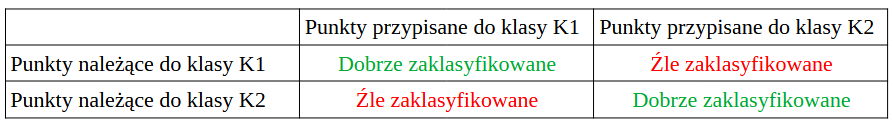

In [ ]:
# zobaczmy macierz pomyłek dla naszego pojedynczego neuronu
from sklearn.metrics import confusion_matrix

y_predicted = neuron.predict(X_test)
confusion_matrix_model = confusion_matrix(y_test, y_predicted)
confusion_matrix_model

array([[3, 1],
       [2, 2]])

# Podsumowanie - Najważniejsze funkcje:

1. network.fit(X_train,Y_train)
Uczy neuron, ustawia wagi
2. network..score(X_train,Y_train) albo network.score(X_test, Y_test) - zwraca nam accuracy score uczenia, czy przejścia po testowych danych
3. y_labels_predicted = network.predict(X_test)
zwraca nam etykiety wyznaczone, możemy wykorzystać je do np. utworzenia macierzy pomyłek: confusion_matrix(y_labels,y_labels_predicted)


# Zadania do samodzielnego wykonania

1)

Proszę stworzyć zestaw punktów należących do dwóch klas: **K1** i **K2**.  Punkty z klasy **K1** powinny być losowane z rozkładu normalnego o średniej **[0, -1]** i wariancji **1**. Punkty z klasy **K2** powinny pochodzić z rozkładu normalnego o średniej **[1, 1]** i wariancji **1**. Całościowo zbiór powinien zawierać **200 punktów**, po 100 dla każdej klasy.   
Należy wybrać **zbiory uczące** o następującej liczebności: **5, 10, 20 oraz 100**.  Dla każdego wariantu podziału znalezy znaleźć równanie **prostej**, która najlepiej oddziela klasy **K1** i **K2**. Uzyskaną prostą należy
zaprezentować razem z punktami testowymi i linią (hiperpłaszczyzną), która oddziela klasy. Następnie należy ocenić to jak dobrze klasyfikator działa od proporcji danych uczących i testujących.

2)

Analiza próbek benzyny wykazała że może ona być przypisana do **dwóch klas** czystości A i B (dla potrzeb zadania można je oznaczyć 0 i 1). Proszę skorzystać z pliku fuel.txt, w którym pierwsze trzy kolumny to właściwości fizykochemiczne próbek, czwarta kolumna - klasa czystości.

Proszę sprawdzić skuteczność sieci opartej o pojedynczy neuron do klasyfikacji w tym problemie, porównując wyniki dla **pięciokrotnego** uczenia sieci. Proszę potraktować wszystkie dane jako dane uczące.

3)

Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris(). Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji **80%/20%**. Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów. Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. Zachęcam do rozważenia pytania: jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów z podanego zbioru pojedyncza warstwa perceptronów? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)

4)

Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?

5)

Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji zbioru irysów z poprzednich zadań, dla wybranych ilości epok (polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok). Żeby zapobiec wcześniejszemu przerywaniu uczenia, w pakiecie Sklearn można ustalić argument tol na odpowiednio małą liczbę czy ustawiając argument early_stopping na False. Można też zamiast tego (lub dodatkowo) nie wyłączać tych kryteriów i zamiast tego prawdzić wartość ilość faktycznych epok potrzebnych do ich osiągnięcia (n_iter_) Proszę przedstawić wnioski, np. na wykresie zależności średniej trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.


Polecamy skorzystać z dokumentacji i materiałów:

Podpinanie dysku google do notatnika (np. na cele pliku fuel.txt):
https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

Pakiet Sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Tutorial pakietu numpy: https://numpy.org/doc/stable/user/quickstart.html

Wykorzystane funkcje pakietu numpy: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html, https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

Dla zainteresowanych:

Zbiór danych irysów: https://en.wikipedia.org/wiki/Iris_flower_data_set